## IMPORTING DEPENDENCIES 

In [1]:
#link: D:\ragda\streamlit\dataset\Spaceship-titanic\train.csv

#importing dependencies 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# LOADING DATASETS

In [2]:
train1=pd.read_csv("./datasets/spaceship_titanic/train.csv")
test=pd.read_csv("./datasets/spaceship_titanic/test.csv")


In [3]:
train1.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

## DATA PREPROCESSING 


In [4]:
train1.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
train1.fillna(method='ffill',inplace=True)

In [6]:
train1.head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [7]:
train1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [8]:
train1.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [9]:
train1.to_excel('test.xlsx')

In [10]:
train1['RoomService']=train1['RoomService'].astype('int64')
train1['FoodCourt']=train1['FoodCourt'].astype('int64')
train1['ShoppingMall']=train1['ShoppingMall'].astype('int64')
train1['Spa']=train1['Spa'].astype('int64')
train1['Age']=train1['Age'].astype('int64')
train1['VRDeck']=train1['VRDeck'].astype('int64')

In [11]:
train1.dtypes

PassengerId     object
HomePlanet      object
CryoSleep         bool
Cabin           object
Destination     object
Age              int64
VIP               bool
RoomService      int64
FoodCourt        int64
ShoppingMall     int64
Spa              int64
VRDeck           int64
Name            object
Transported       bool
dtype: object

In [12]:
##########################################################################################

planet_mapping = {'Europa': 0, 'Earth': 1, 'Mars': 2}
# Apply the mapping to the 'Homeplanet' column
train1['HomePlanet'] = train1['HomePlanet'].map(planet_mapping)

##########################################################################################

train1['Sector']=train1['Cabin'].str.split('/',expand=True)[0]
train1['Wing']=train1['Cabin'].str.split('/',expand=True)[2]
train1['Wing']=train1['Wing'].replace({'P':0, 'S':1})

##########################################################################################

Destination_mapping={'TRAPPIST-1e' : 0,
                     'PSO J318.5-22' : 1,
                     '55 Cancri e': 2}
train1['Destination']=train1['Destination'].map(Destination_mapping)

##########################################################################################

label_encoder = LabelEncoder()
train1['CryoSleep'] = label_encoder.fit_transform(train1['CryoSleep'])
train1['VIP']=label_encoder.fit_transform(train1['VIP'])
train1['Transported']=label_encoder.fit_transform(train1['Transported'])
train1['Sector'] = label_encoder.fit_transform(train1['Sector'])

In [13]:
train1.head()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  VIP  \
0     0001_01           0          0  B/0/P            0   39    0   
1     0002_01           1          0  F/0/S            0   24    0   
2     0003_01           0          0  A/0/S            0   58    1   
3     0003_02           0          0  A/0/S            0   33    0   
4     0004_01           1          0  F/1/S            0   16    0   

   RoomService  FoodCourt  ShoppingMall   Spa  VRDeck               Name  \
0            0          0             0     0       0    Maham Ofracculy   
1          109          9            25   549      44       Juanna Vines   
2           43       3576             0  6715      49      Altark Susent   
3            0       1283           371  3329     193       Solam Susent   
4          303         70           151   565       2  Willy Santantines   

   Transported  Sector  Wing  
0            0       1     0  
1            1       5     1  
2            0       0     1  
3            0       0     1  
4            1       5     1

In [14]:
Dropping_columns=['PassengerId','Cabin','Name']
train1.drop(columns=Dropping_columns,inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


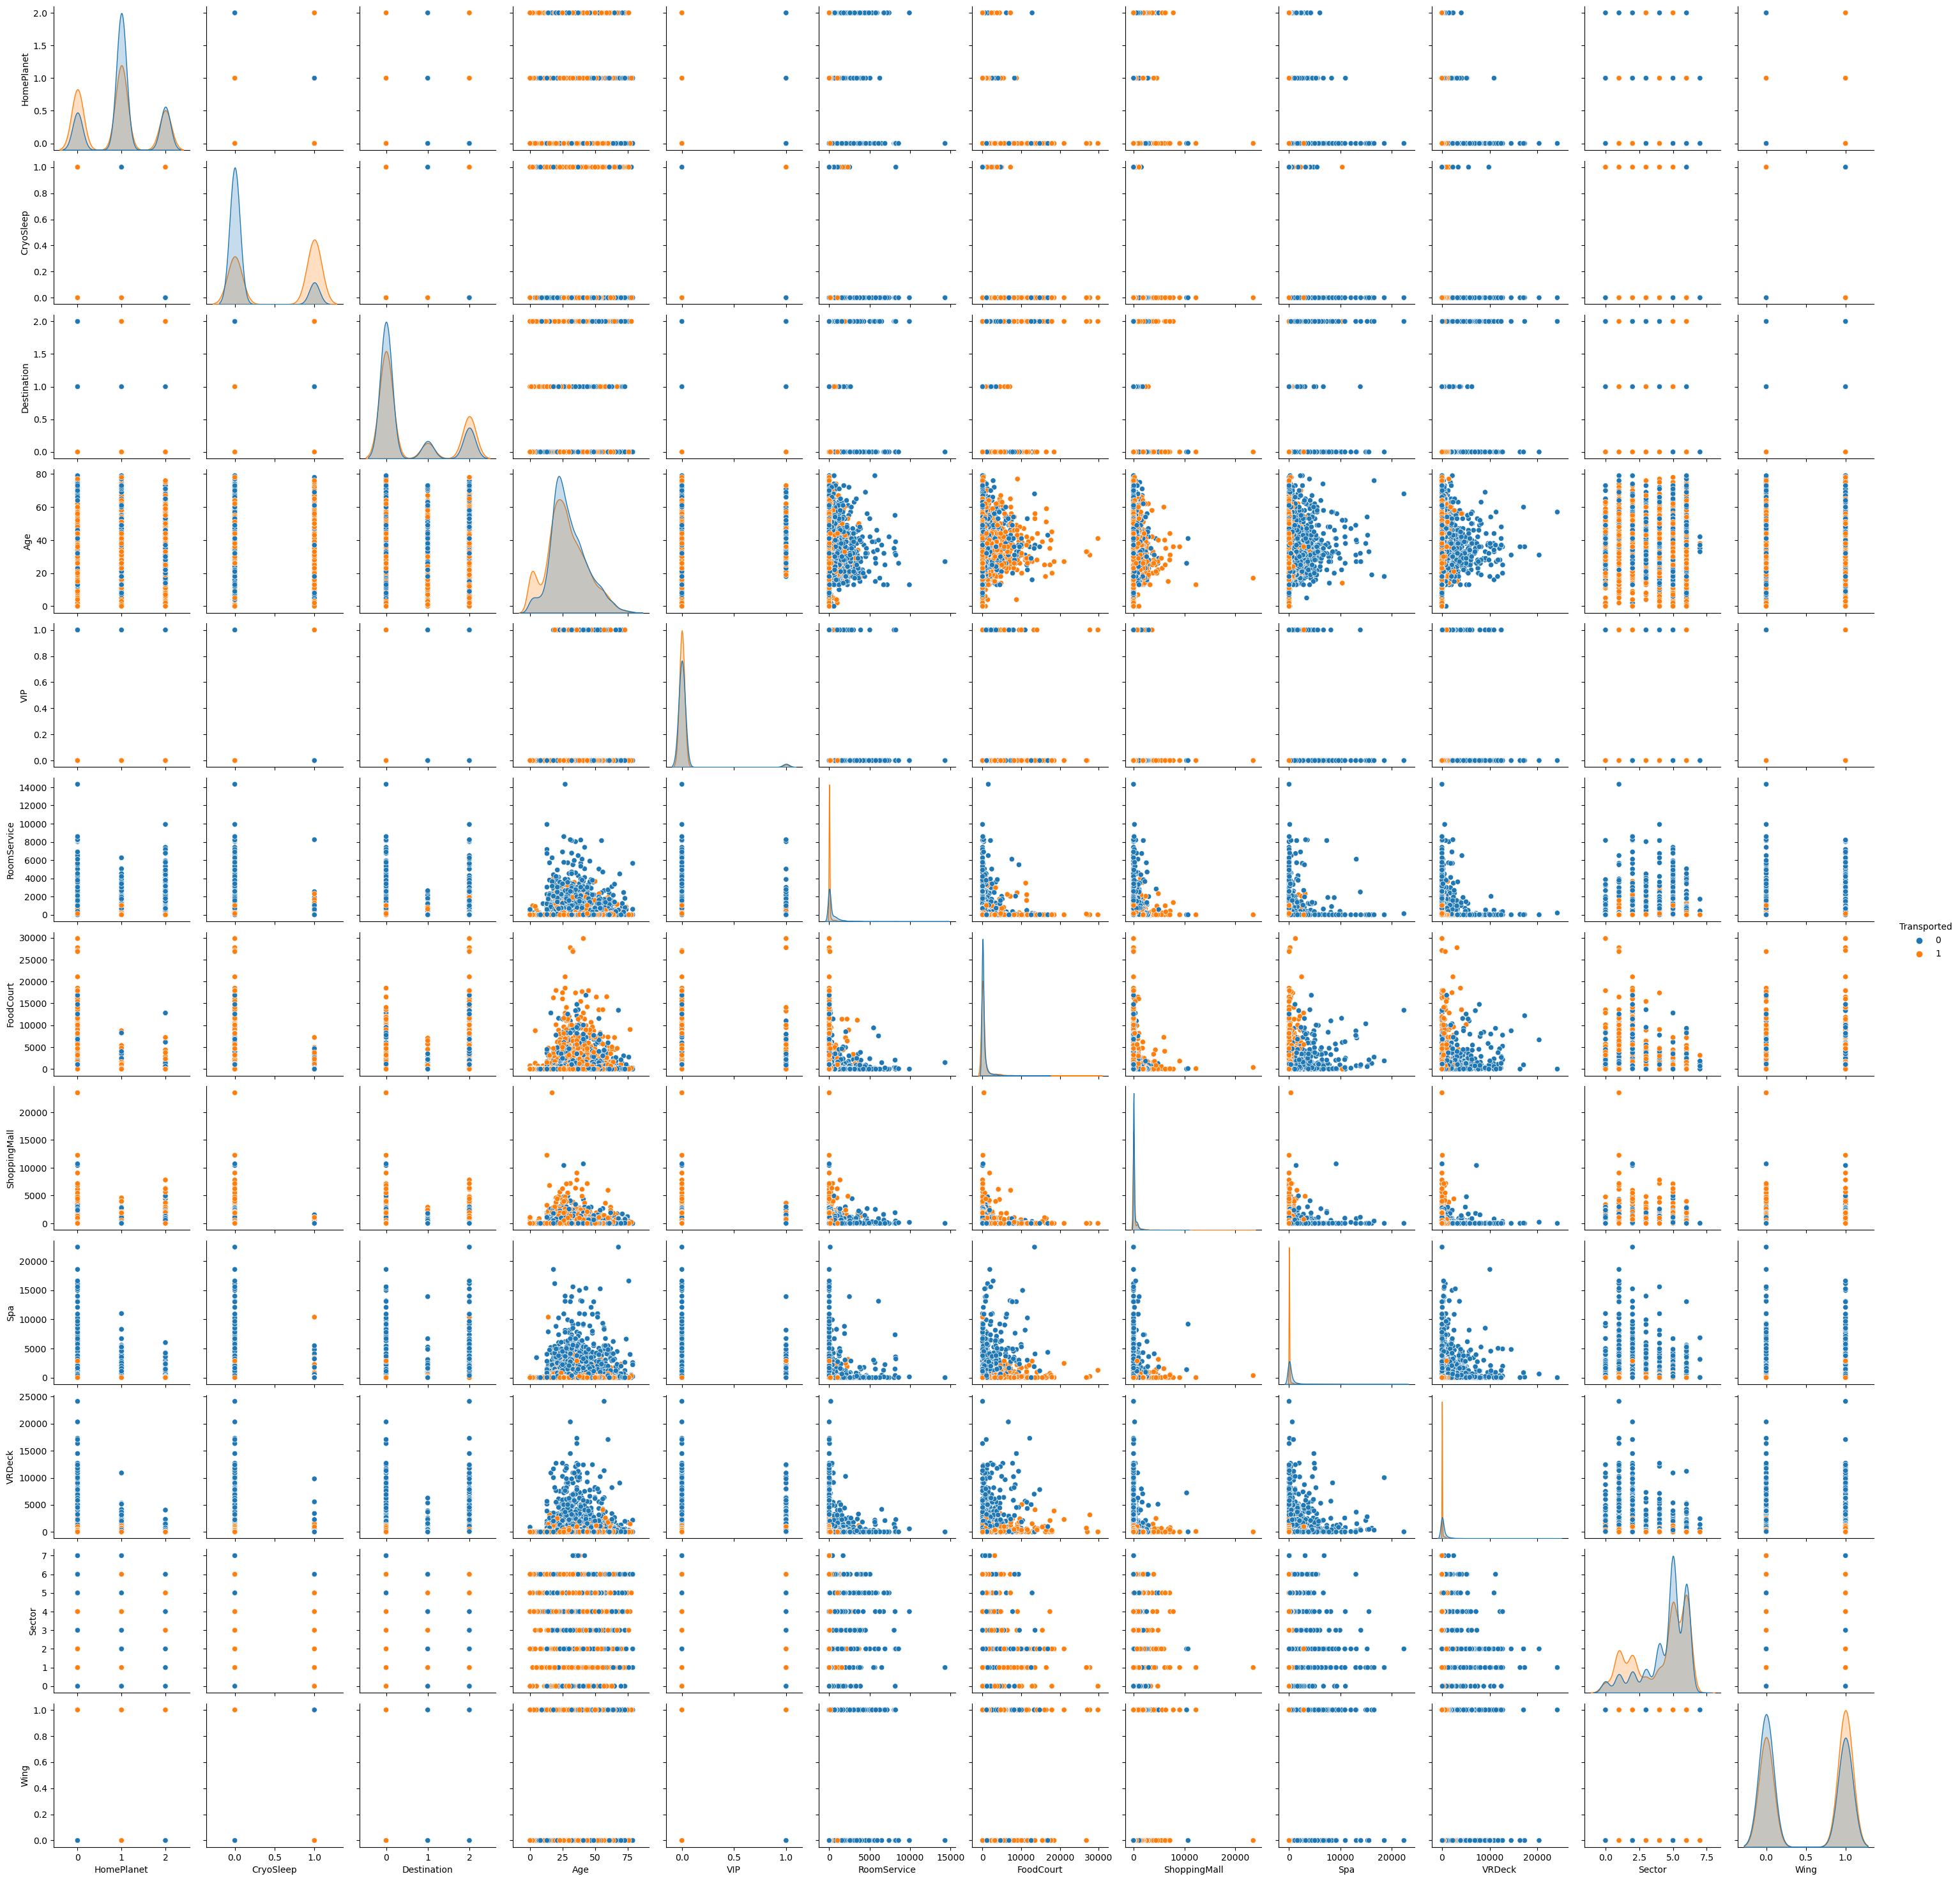

In [15]:
sb.pairplot(train1,hue='Transported')

In [16]:
train1.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Sector',
       'Wing'],
      dtype='object')

## SPLITING TESTING & TRAINING DATA

In [17]:
X=train1.iloc[:,train1.columns!='Transported']
y=train1['Transported']

In [18]:
X.head()

HomePlanet  CryoSleep  Destination  Age  VIP  RoomService  FoodCourt  \
0           0          0            0   39    0            0          0   
1           1          0            0   24    0          109          9   
2           0          0            0   58    1           43       3576   
3           0          0            0   33    0            0       1283   
4           1          0            0   16    0          303         70   

   ShoppingMall   Spa  VRDeck  Sector  Wing  
0             0     0       0       1     0  
1            25   549      44       5     1  
2             0  6715      49       0     1  
3           371  3329     193       0     1  
4           151   565       2       5     1

In [19]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## REGRESSOR 

In [33]:
parameters={
    'penalty':['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs'],
    'C':[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,50,40,60,70,80,90],
    'max_iter': [1000],
    'n_jobs':[5],
}

In [34]:
#regressor
lr=LogisticRegression()

In [35]:
lr_regressor=GridSearchCV(lr,param_grid=parameters,scoring='accuracy',cv=10)

In [36]:
lr_regressor.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
420 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30,
                               35, 50, 40, 60, 70, 80, 90],
                         'max_iter': [1000], 'n_jobs': [5],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [37]:
lr_regressor.best_params_

{'C': 70, 'max_iter': 1000, 'n_jobs': 5, 'penalty': 'l2', 'solver': 'lbfgs'}

In [38]:
lr_regressor.best_score_

0.7892345895413381

## PREDICTING VALUES


In [40]:
##prediction
y_pred=lr_regressor.predict(X_test)

In [41]:
##accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [42]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7681692732290708


In [43]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1016
           1       0.80      0.75      0.78      1158

    accuracy                           0.77      2174
   macro avg       0.77      0.77      0.77      2174
weighted avg       0.77      0.77      0.77      2174

